In [1]:
from __future__ import print_function
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils
import numpy as np
from six.moves import cPickle as pickle
from six.moves import range
import os
import keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import os
import pickle
import random

import load_data
import models

Using TensorFlow backend.


In [2]:
print("notMNIST")
notMNIST_x_train, notMNIST_y_train, notMNIST_x_valid, notMNIST_y_valid, notMNIST_x_test, notMNIST_y_test = load_data.data_notMNIST()
print("MNIST")
MNIST_X_train, MNIST_Y_train, MNIST_X_val, MNIST_Y_val, MNIST_X_test, MNIST_Y_test = load_data.data_MNIST()

notMNIST
20000 train samples
1000 valid samples
1000 test samples
MNIST
Train labels dimension:
(50000, 10)
Test labels dimension:
(10000, 10)


In [3]:
def Ensembling_Data(M, MNIST_X_train, MNIST_Y_train):
#     M = 5
    sampled_indices = np.arange(0,MNIST_X_train.shape[0])
    random.shuffle(sampled_indices)

    cut = int(MNIST_X_train.shape[0]/M)
    index_sample_list = []
    for i in range(M):
        index_sample_list.append(sampled_indices[cut*i:cut*(i+1)])
        
    training_X_df = []; training_Y_df = []
    for index_range in index_sample_list:
        training_X_df.append(MNIST_X_train[[index_range]])
        training_Y_df.append(MNIST_Y_train[[index_range]])
        
    return training_X_df, training_Y_df

In [118]:
M=5
training_X_df, training_Y_df = Ensembling_Data(M, MNIST_X_train, MNIST_Y_train)

prediction_storage=[]
for i in range(M):
    X_train = training_X_df[i]
    Y_train = training_Y_df[i]
    pred = models.MLP(X_train, Y_train, MNIST_X_val, MNIST_Y_val, MNIST_X_test, MNIST_Y_test)
    prediction_storage.append(pred)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnin

Without Dropout, Vanilla MLP
Epoch:0 | Train loss: 52.94 | Train acc: 0.847 | Test acc:0.847
Epoch:1 | Train loss: 46.67 | Train acc: 0.917 | Test acc:0.909
Epoch:2 | Train loss: 41.22 | Train acc: 0.936 | Test acc:0.924
Epoch:3 | Train loss: 36.46 | Train acc: 0.944 | Test acc:0.927
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 56.46 | Train acc: 0.868 | Test acc:0.867
Epoch:1 | Train loss: 50.12 | Train acc: 0.918 | Test acc:0.907
Epoch:2 | Train loss: 44.59 | Train acc: 0.931 | Test acc:0.916
Epoch:3 | Train loss: 39.73 | Train acc: 0.934 | Test acc:0.918
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 56.91 | Train acc: 0.862 | Test acc:0.866
Epoch:1 | Train loss: 50.44 | Train acc: 0.909 | Test acc:0.907
Epoch:2 | Train loss: 44.80 | Train acc: 0.915 | Test acc:0.910
Epoch:3 | Train loss: 39.83 | Train acc: 0.934 | Test acc:0.922
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 52.10 | Train acc: 0.873 | Test acc:0.875
Epoch:1 | Train loss: 45.95 | Train acc: 0.913 | Test acc:0.906
Epoch:2 | Train loss: 40.59 | Train acc: 0.929 | Test acc:0.920
Epoch:3 | Train loss: 35.89 | Train acc: 0.942 | Test acc:0.925
Without Dropout, Vanilla MLP


/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch:0 | Train loss: 54.50 | Train acc: 0.827 | Test acc:0.825
Epoch:1 | Train loss: 48.15 | Train acc: 0.894 | Test acc:0.886
Epoch:2 | Train loss: 42.60 | Train acc: 0.934 | Test acc:0.919
Epoch:3 | Train loss: 37.72 | Train acc: 0.947 | Test acc:0.931


In [119]:
avg_predictions_from_ensemble=[]
for j in range(len(prediction_storage[0])):
    tmpList=[]
    for i in range(M):
        tmpList.append(prediction_storage[i][j])
    pred_avg = np.average(tmpList, axis=0)
    avg_predictions_from_ensemble.append(pred_avg)

In [136]:
def NLL(pred_values, MNIST_Y_test, index_of_y):

    from keras import backend as K

    # generate NLL distribution
#     pred_hotcoded = np_utils.to_categorical(pred_values, 10)[index_of_y:index_of_y+1]

    # y_test = y_test.astype('float32') # necessary here, since y_pred comes in this type - check in your case with y_test.dtype and y_pred.dtype
    # y_test = K.constant(y_test)
    # y_pred = K.constant(y_pred)

#     y_pred = K.constant(pred_hotcoded)
    
    y_pred = K.constant(pred_values[index_of_y:index_of_y+1])

    g = K.categorical_crossentropy(target=MNIST_Y_test[index_of_y:index_of_y+1], output=y_pred)  # tensor
    ce = K.eval(g)  # 'ce' for cross-entropy
    ce.shape
    # (10000,) # i.e. one loss quantity per sample

    # sum up and divide with the no. of samples:
    log_loss = np.sum(ce)/ce.shape[0]
#     log_loss
    # 0.05165323486328125
    
    # https://stackoverflow.com/questions/52497625/how-to-calculate-negative-log-likelihoog-on-mnist-dataset
    return log_loss

def entropy_values(MNIST_Y_test, prediction):
    entropy_values=[]
    for i in range(len(MNIST_Y_test[0:200])): # WARNING: Remove 100 limit, let whole dataframe!!!
        log_loss = NLL(prediction, MNIST_Y_test, i)
        entropy_values.append(log_loss)
        print(i)
    #     print(log_loss)
    return entropy_values

# def entropy_values_faster(MNIST_Y_test, prediction):
# #     entropy_values=[]
# #     for i in range(len(MNIST_Y_test[0:])): # WARNING: Remove 100 limit, let whole dataframe!!!
# #         log_loss = NLL(prediction, MNIST_Y_test, i)
# #         entropy_values.append(log_loss)
#     entropy_values = [NLL(prediction, MNIST_Y_test, i) for i in range(len(MNIST_Y_test))]
#     #     print(log_loss)
#     return entropy_values

In [123]:
# avg_predictions_from_ensemble2 = np.array([list(i) for i in avg_predictions_from_ensemble])
# entropy_values = entropy_values(MNIST_Y_test, avg_predictions_from_ensemble2)

In [137]:
avg_predictions_from_ensemble2 = np.array([list(i) for i in avg_predictions_from_ensemble])
entropy_values = entropy_values(MNIST_Y_test, avg_predictions_from_ensemble2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


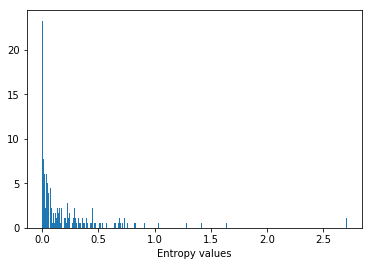

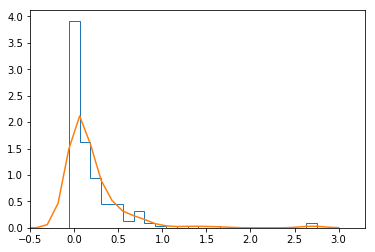

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(entropy_values, normed=True, bins=300)
plt.xlabel('Entropy values')
plt.show()

import scipy.stats as stats

density = stats.gaussian_kde(entropy_values)
n, x, _ = plt.hist(entropy_values, bins=np.linspace(-3, 3, 50), 
                   histtype=u'step', density=True)  
plt.plot(x, density(x))
plt.xlim(-0.5,)
plt.show()